# Capstone Project — The Battle of Neighbourhoods

### Introduction
Noida, short for the New Okhla Industrial Development Authority, is a planned city under the management of the New Okhla Industrial Development Authority (also called NOIDA). It is a satellite city of Delhi and is part of the National Capital Region of India. As per provisional reports of Census of India, the population of Noida in 2011 was 642,381. Noida is located in Gautam Buddh Nagar district of Uttar Pradesh state in close proximity to NCT of Delhi. The district's administrative headquarters are in the nearby city of Greater Noida.

The city is a part of the Noida (Vidhan Sabha) constituency and Gautam Buddha Nagar (Lok Sabha) constituency. Minister of State for Culture and Tourism Mahesh Sharma is the present Lok Sabha MP of Gautam Buddha Nagar, while Pankaj Singh is the present MLA of Noida

Noida was ranked as the Best City in Uttar Pradesh and the Best City in Housing in all of India in "Best City Awards" conducted by ABP News in 2015. Noida replaced Mumbai as the second-best realty destination, according to an analyst report. Roads in Noida are lined by trees and it is considered to be India's greenest city with nearly 50% green cover, the highest of any city in India.It's GDP is estimated to be around $25 Billion as of 2019.
</p>
With it’s diverse culture , comes diverse food items. There are many restaurants in New Delhi City, each belonging to different categories like Chinese , Italian , French etc.
Noida is also a hub for food , it has multiple mall and resturants.Many sectors and ares are dedicated to food places and they cover diverse cuisine

So as part of this project , we will list and visualise all major parts of Noida .
   </p>

 ### Questions that can be asked using the above mentioned datasets
- What is best location in Noida for South Indian ? 
- Which areas have large number of South Indian Resturant Market ? 
- Which all areas have less number of resturant ?
- Which is the best place to stay if I prefer South Indian Cuisine ?
- What places are have best restaurant in Noida?

### Data
For this project we need the following data :
<ul>
<li> Noida Resturants data that contains list Locality, Resturant name,Rating along with their latitude and longitude.
    <ul>
        <li>Data source : <a href="https://www.kaggle.com/shrutimehta/zomato-restaurants-data">Zomato kaggel dataset</a>
 <li> Description : This data set contains the required information. And we will use this data set to explore various locality of noida city.
     </ul>
<li> Nearby places in each locality of noida city.
        <ul>
            <li>Data source : <a href="https://developer.foursquare.com/"> Fousquare API </a>
        <li> Description : By using this api we will get all the venues in each neighborhood. 
    

### Approach
- Collect the new delhi city data from <a href="https://www.kaggle.com/shrutimehta/zomato-restaurants-data">Zomato kaggel dataset</a>
- Using FourSquare API we will find all venues for each neighborhood.
- Filter out all venues that are nearby by locality.
- Using aggregative rating for each resturant to find the best places.
- Visualize the Ranking of neighborhoods using folium library(python)

In [9]:
import pandas as pd
import numpy as np
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
#! pip install geocoder
import geocoder

## Read the zomato resturant data from csv file

In [10]:
df = pd.read_csv('zomato.csv',encoding='ISO-8859-1')
df_india = df[df['Country Code'] == 1]
## New Delhi
df_noida = df_india[df_india['City'] == 'Noida']

df_noida.reset_index(drop=True, inplace=True)
df_noida.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,310063,Ali Baba Caves,1,Noida,"1st Floor, Ansal Plaza Mall, Pari Chowk, Great...","Ansal Plaza Mall, Greater Noida","Ansal Plaza Mall, Greater Noida, Noida",77.528129,28.458107,"Cafe, Chinese",...,Indian Rupees(Rs.),No,No,No,No,2,3.1,Orange,Average,15
1,312214,Cafí© Doo Ghoont,1,Noida,"AG-13, Atrium Floor, Ansal Plaza Mall, Greater...","Ansal Plaza Mall, Greater Noida","Ansal Plaza Mall, Greater Noida, Noida",77.507456,28.463957,Cafe,...,Indian Rupees(Rs.),No,Yes,No,No,2,3.4,Orange,Average,50
2,309641,Knights Chaska,1,Noida,"201 to 207, 2nd Floor, Ansal Plaza Mall, Great...","Ansal Plaza Mall, Greater Noida","Ansal Plaza Mall, Greater Noida, Noida",77.507834,28.464434,"North Indian, Chinese",...,Indian Rupees(Rs.),Yes,No,No,No,2,2.9,Orange,Average,6
3,306688,Thirsty Scholar Cafe,1,Noida,"SF-256, 2nd Floor, Ansal Plaza Mall, Near Pari...","Ansal Plaza Mall, Greater Noida","Ansal Plaza Mall, Greater Noida, Noida",77.507701,28.464201,Cafe,...,Indian Rupees(Rs.),No,No,No,No,1,3.2,Orange,Average,45
4,18440427,Savoury Street,1,Noida,"GF-37, 1st Floor, Ansal Plaza Mall, Greater No...","Ansal Plaza Mall, Greater Noida","Ansal Plaza Mall, Greater Noida, Noida",77.507701,28.464201,"North Indian, Continental, Italian",...,Indian Rupees(Rs.),No,No,No,No,2,0.0,White,Not rated,3


## Data Cleaning
#### remove the unwanted columns and rows from dataset

In [11]:
df_Res= df_noida[df_noida.Longitude !=0.000000][['Restaurant Name','Locality','Longitude','Latitude','Cuisines','Aggregate rating','Rating text','Votes']]

In [12]:
df_Res = df_Res[df_Res['Aggregate rating'] !=0.0]

In [13]:
df_Res.head()

,Restaurant Name,Locality,Longitude,Latitude,Cuisines,Aggregate rating,Rating text,Votes
0,Ali Baba Caves,"Ansal Plaza Mall, Greater Noida",77.528129,28.458107,"Cafe, Chinese",3.1,Average,15
1,Cafí© Doo Ghoont,"Ansal Plaza Mall, Greater Noida",77.507456,28.463957,Cafe,3.4,Average,50
2,Knights Chaska,"Ansal Plaza Mall, Greater Noida",77.507834,28.464434,"North Indian, Chinese",2.9,Average,6
3,Thirsty Scholar Cafe,"Ansal Plaza Mall, Greater Noida",77.507701,28.464201,Cafe,3.2,Average,45
5,JSB Evergreen Snack & Sweets,Brahmaputra Shopping Complex,77.332577,28.569899,"North Indian, Chinese, Fast Food, Street Food",3.1,Average,47


### created map to show the restaurant cluters 

In [14]:
Noida_Rest = folium.Map(location=[28.52, 77.25], zoom_start=12)

X = df_Res['Latitude']
Y = df_Res['Longitude']
Z = np.stack((X, Y), axis=1)

kmeans = KMeans(n_clusters=5, random_state=0).fit(Z)

clusters = kmeans.labels_
colors = ['red', 'green', 'blue', 'yellow','orange']
df_Res ['Cluster'] = clusters

for latitude, longitude, Locality, cluster in zip(df_Res['Latitude'], df_Res['Longitude'], df_Res['Locality'], df_Res['Cluster']):
    label = folium.Popup(Locality, parse_html=True)
    folium.CircleMarker(
        [latitude, longitude],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(Noida_Rest)  

Noida_Rest

In [15]:
df_Res.head()

,Restaurant Name,Locality,Longitude,Latitude,Cuisines,Aggregate rating,Rating text,Votes,Cluster
0,Ali Baba Caves,"Ansal Plaza Mall, Greater Noida",77.528129,28.458107,"Cafe, Chinese",3.1,Average,15,1
1,Cafí© Doo Ghoont,"Ansal Plaza Mall, Greater Noida",77.507456,28.463957,Cafe,3.4,Average,50,1
2,Knights Chaska,"Ansal Plaza Mall, Greater Noida",77.507834,28.464434,"North Indian, Chinese",2.9,Average,6,1
3,Thirsty Scholar Cafe,"Ansal Plaza Mall, Greater Noida",77.507701,28.464201,Cafe,3.2,Average,45,1
5,JSB Evergreen Snack & Sweets,Brahmaputra Shopping Complex,77.332577,28.569899,"North Indian, Chinese, Fast Food, Street Food",3.1,Average,47,0


## What places are have best restaurant in Noida?

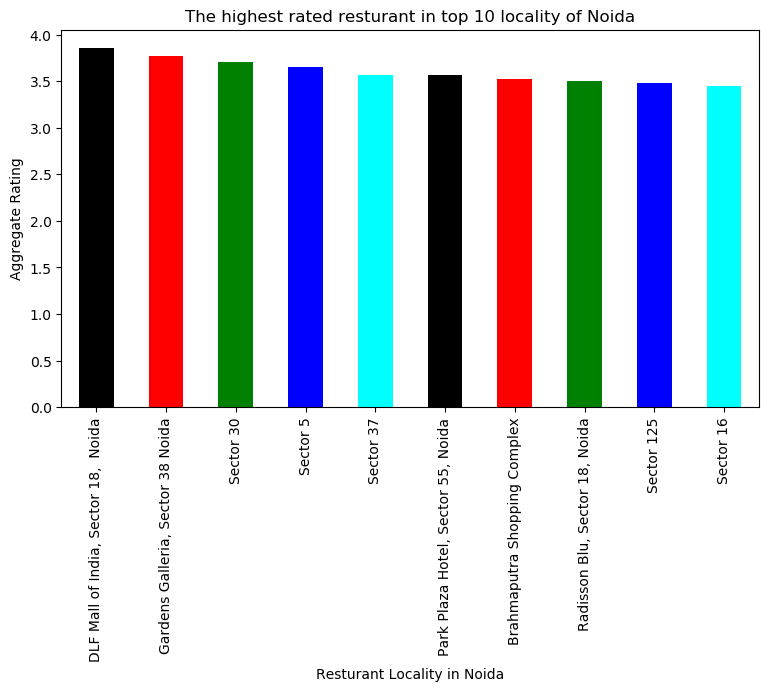

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The highest rated resturant in top 10 locality of Noida')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Aggregate rating'].mean().nlargest(10).plot(kind='bar',color=['black', 'red', 'green', 'blue', 'cyan'])

plt.xlabel('Resturant Locality in Noida')
#On y-axis
plt.ylabel('Aggregate Rating')
#displays the plot
plt.show()


The best restarants are available in <b>DLF Mall of India</b>

## what places are have worst restaurants in Noida?

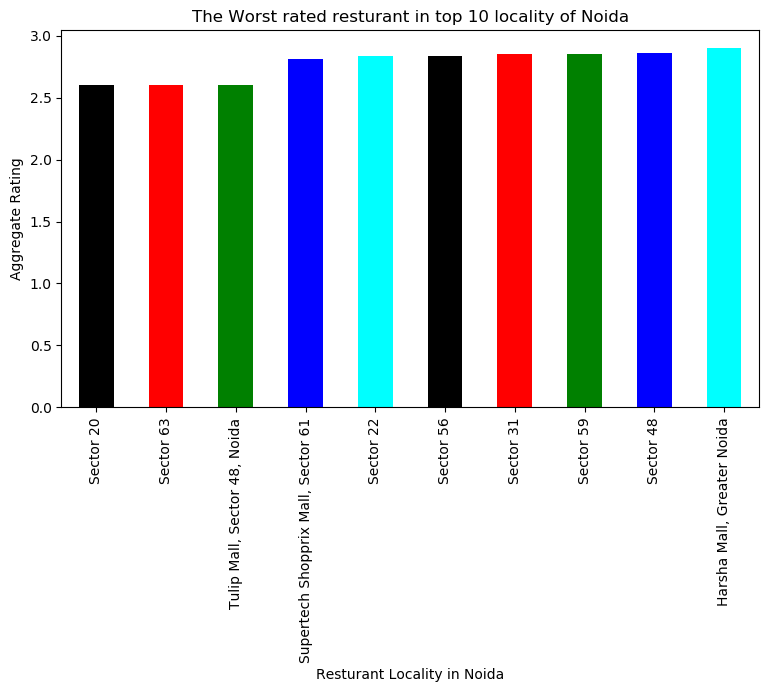

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The Worst rated resturant in top 10 locality of Noida')
#On x-axis

#giving a bar plot

df_Res.groupby('Locality')['Aggregate rating'].mean().nsmallest(10).plot(kind='bar',color=['black', 'red', 'green', 'blue', 'cyan'])

plt.xlabel('Resturant Locality in Noida')
#On y-axis
plt.ylabel('Aggregate Rating')

#displays the plot
plt.show()

The worst restarants are available in <b>Sector 20</b>

## Which place are suitable for foodie in Noida?

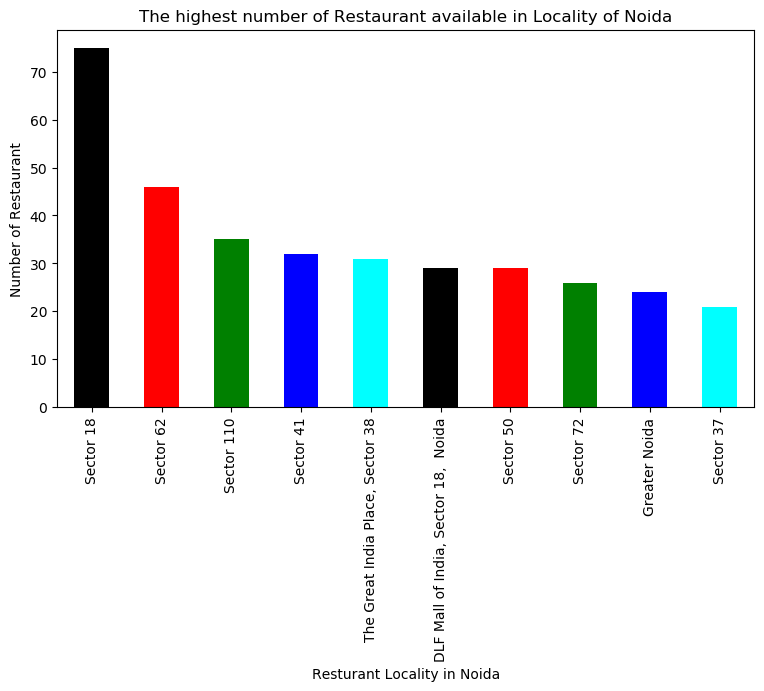

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The highest number of Restaurant available in Locality of Noida')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Restaurant Name'].count().nlargest(10).plot(kind='bar',color=['black', 'red', 'green', 'blue', 'cyan'])

plt.xlabel('Resturant Locality in Noida')
#On y-axis
plt.ylabel('Number of Restaurant')

#displays the plot
plt.show()

<b>Sector 18</b> is the best places for foodie person to stay there.

## Which place are not suitable for foodie  in Noida?

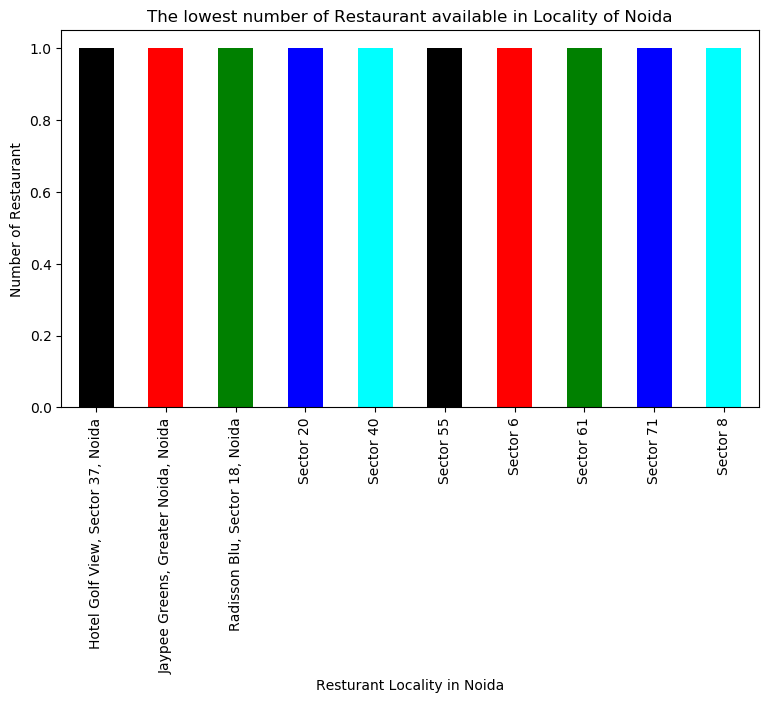

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The lowest number of Restaurant available in Locality of Noida')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Restaurant Name'].count().nsmallest(10).plot(kind='bar',color=['black', 'red', 'green', 'blue', 'cyan'])

plt.xlabel('Resturant Locality in Noida')
#On y-axis
plt.ylabel('Number of Restaurant')

#displays the plot
plt.show()

## What are the best places for South Indian restaurant in Noida

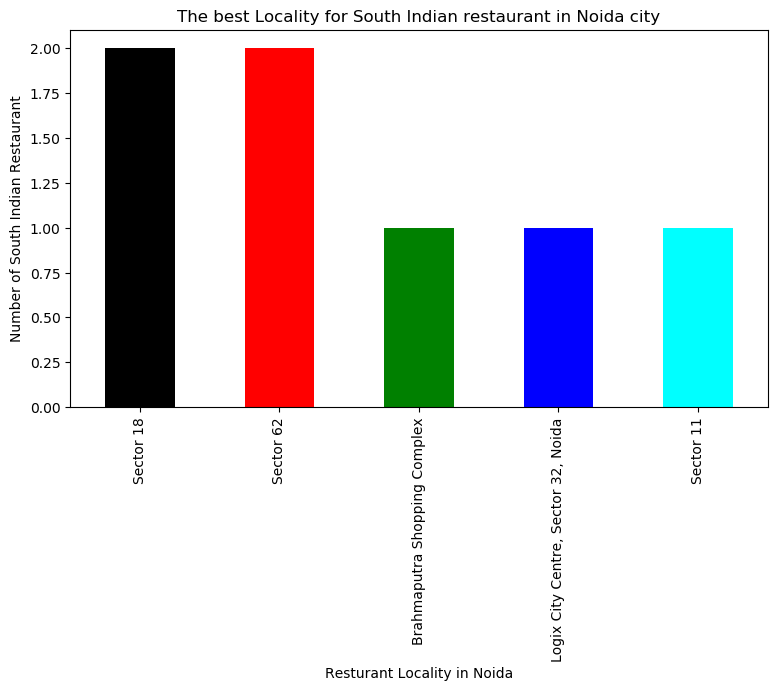

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The best Locality for South Indian restaurant in Noida city')
#On x-axis

#giving a bar plot
df_Res[df_Res['Cuisines'].str.startswith('South Indian')].groupby('Locality')['Restaurant Name'].count().nlargest(5).plot(kind='bar',color=['black', 'red', 'green', 'blue', 'cyan'])

plt.xlabel('Resturant Locality in Noida')
#On y-axis
plt.ylabel('Number of South Indian Restaurant')

#displays the plot
plt.show()

<b>Sector 18 & Sector 62</b> is the best place for South Indian restaurant.

## which places are the best South Indian resturants in Noida? ( BASED ON ZOMATO RATINGS)  

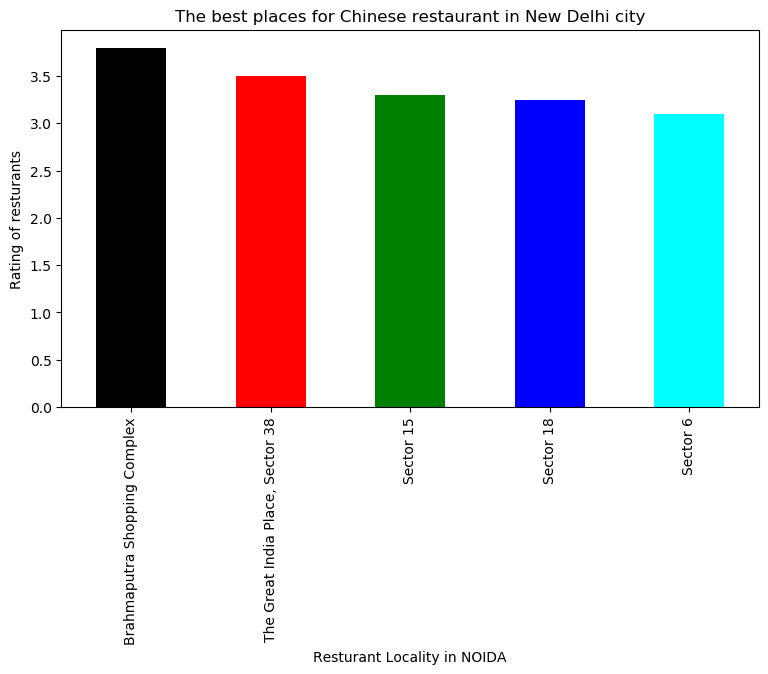

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The best places for Chinese restaurant in New Delhi city')
#On x-axis

#giving a bar plot
df_Res[df_Res['Cuisines'].str.startswith('South Indian')].groupby('Locality')['Aggregate rating'].mean().nlargest(5).plot(kind='bar',color=['black', 'red', 'green', 'blue', 'cyan'])

plt.xlabel('Resturant Locality in NOIDA')
#On y-axis
plt.ylabel('Rating of resturants')

#displays the plot
plt.show()

<b>Bramhmaputra </b> has the best South Indian resturants.

### Data transformation
Based on Locality grouping the data

In [22]:
df_Res_Loc =  df_Res.groupby('Locality').count()['Restaurant Name'].to_frame()
df_Res_rating= df_Res.groupby('Locality')['Aggregate rating'].mean().to_frame()
d_Cuisines = df_Res.groupby(['Locality'])['Cuisines'].agg(', '.join).reset_index()
d_R = df_Res.groupby(['Locality'])['Rating text'].unique().agg(', '.join).reset_index()
d_V = df_Res.groupby(['Locality'])['Votes'].sum().to_frame()
d_Lat = df_Res.groupby('Locality').mean()['Latitude'].to_frame()
d_Lng = df_Res.groupby('Locality').mean()['Longitude'].to_frame()
df_final = pd.merge(d_Lat,d_Lng,on='Locality').merge(df_Res_Loc, on='Locality').merge(d_Cuisines, on='Locality').merge(df_Res_rating,on ='Locality').merge(d_R, on ='Locality').merge(d_V, on ='Locality')

In [23]:
df_final = df_final[df_final['Aggregate rating'] != 0.000000]
df_final.columns =['Locality','Lat','Lng', 'No_of_Restaurant','Cusines', 'Agg_Rating','Comments' ,'No_of_Votes']
df_final.head()

,Locality,Lat,Lng,No_of_Restaurant,Cusines,Agg_Rating,Comments,No_of_Votes
0,"Ansal Plaza Mall, Greater Noida",28.462675,77.512780,4,"Cafe, Chinese, Cafe, North Indian, Chinese, Cafe",3.150000,Average,116
1,Brahmaputra Shopping Complex,28.570019,77.332701,4,"North Indian, Chinese, Fast Food, Street Food,...",3.525000,"Average, Good",1075
2,"Centre Stage Mall, Sector 18",28.568185,77.323030,4,"Asian, Continental, Italian, North Indian, Nor...",3.100000,"Average, Good, Poor",1247
3,"DLF Mall of India, Sector 18, Noida",28.567267,77.320868,29,"North Indian, Mughlai, North Indian, European,...",3.858621,"Average, Excellent, Good, Very Good",8242
4,"Fortune Inn Grazia, Sector 27, Noida",28.577435,77.328359,2,"North Indian, Mughlai, Chinese",3.300000,Average,94


In [24]:
df_final.shape

(77, 8)

## Define Foursquare Credentials and Version

In [26]:
## Define Foursquare Credentials and Version
CLIENT_ID = 'xxx' # your Foursquare ID\n",	    "CLIENT_ID = 'removed' # your Foursquare ID\n",
CLIENT_SECRET = 'xxx' # your Foursquare 
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + 'XXXXXXXXXXXXXXXXXXXXXXX')
print('CLIENT_SECRET:' + 'XXXXXXXXXXXXXXXXXXXX')

Your credentails:
CLIENT_ID: XXXXXXXXXXXXXXXXXXXXXXX
CLIENT_SECRET:XXXXXXXXXXXXXXXXXXXX


## create a function to repeat the same process to all the Locality in New Delhi

In [27]:
## create a function to repeat the same process to all the Locality in New Delhi

def getNearbyVenues(names, latitudes, longitudes, radius=500,LIMIT = 100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Locality', 
                  'Locality Latitude', 
                  'Locality Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

## find the venues in all Noida Locality

In [28]:
# find the venues in all New Delhi Locality
noida_venues = getNearbyVenues(names=df_final['Locality'],
                                   latitudes=df_final['Lat'],
                                   longitudes=df_final['Lng']
                                  )

Ansal Plaza Mall, Greater Noida
Brahmaputra Shopping Complex
Centre Stage Mall, Sector 18
DLF Mall of India, Sector 18,  Noida
Fortune Inn Grazia, Sector 27, Noida
Ganga Shopping Complex, Sector 29
Gardens Galleria, Sector 38 Noida
Greater Noida
Harsha Mall, Greater Noida
Hotel Golf View, Sector 37, Noida
Jaipuria Plaza, Sector 26, Noida
Jaypee Greens Golf & Spa Resort, Surajpur
Jaypee Greens, Greater Noida, Noida
Logix City Centre, Sector 32, Noida
MSX Mall, Greater Noida
Mosaic Hotels, Sector 18, Noida 
Park Plaza Hotel, Sector 55, Noida
Radisson Blu, Sector 18, Noida
Sector 10
Sector 11
Sector 110
Sector 12
Sector 125
Sector 132
Sector 15
Sector 16
Sector 18
Sector 19
Sector 2
Sector 20
Sector 21
Sector 22
Sector 25
Sector 26
Sector 27
Sector 28
Sector 29
Sector 3
Sector 30
Sector 31
Sector 33
Sector 34
Sector 37
Sector 38
Sector 39
Sector 40
Sector 41
Sector 44
Sector 45
Sector 47
Sector 48
Sector 49
Sector 5
Sector 50
Sector 51
Sector 52
Sector 53
Sector 55
Sector 56
Sector 58
Sec

In [30]:
noida_venues.head()

,Locality,Locality Latitude,Locality Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Ansal Plaza Mall, Greater Noida",28.462675,77.512780,BIKANERVALA,28.463515,77.510857,Indian Restaurant
1,"Ansal Plaza Mall, Greater Noida",28.462675,77.512780,OMAXE NRI CITY CENTRE,28.463795,77.510017,Shopping Mall
2,"Ansal Plaza Mall, Greater Noida",28.462675,77.512780,Pari Chowk,28.465239,77.511292,Monument / Landmark
3,"Ansal Plaza Mall, Greater Noida",28.462675,77.512780,Savoy Suites,28.464374,77.509695,Hotel
4,Brahmaputra Shopping Complex,28.570019,77.332701,Lakshmi Coffee House,28.570140,77.332734,South Indian Restaurant


In [31]:
noida_venues.groupby('Locality').count()

,Locality Latitude,Locality Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Locality,,,,,,
"Ansal Plaza Mall, Greater Noida",4,4,4,4,4,4
Brahmaputra Shopping Complex,6,6,6,6,6,6
"Centre Stage Mall, Sector 18",50,50,50,50,50,50
"DLF Mall of India, Sector 18, Noida",44,44,44,44,44,44
"Fortune Inn Grazia, Sector 27, Noida",7,7,7,7,7,7
...,...,...,...,...,...,...
"Shopprix Mall, Sector 61, Noida",7,7,7,7,7,7
"Spice World Mall, Sector 25",8,8,8,8,8,8
"Supertech Shopprix Mall, Sector 61",7,7,7,7,7,7


In [32]:
print('There are {} uniques categories.'.format(len(noida_venues['Venue Category'].unique())))

There are 83 uniques categories.


In [33]:
## Analyze Each Locality

# one hot encoding
noida_onehot = pd.get_dummies(noida_venues[['Venue Category']], prefix="", prefix_sep="")

# add Locality column back to dataframe
noida_onehot['Locality'] = noida_venues['Locality'] 

# move Locality column to the first column
column_list = noida_onehot.columns.tolist()
column_number = int(column_list.index('Locality'))
column_list = [column_list[column_number]] + column_list[:column_number] + column_list[column_number+1:]
noida_onehot = noida_onehot[column_list]

noida_onehot.head()

,Locality,ATM,Arcade,Asian Restaurant,Astrologer,Auto Garage,BBQ Joint,Bakery,Bar,Bistro,...,Snack Place,South Indian Restaurant,Spa,Sporting Goods Shop,Stadium,Supermarket,Tea Room,Theme Park,Train Station,Vegetarian / Vegan Restaurant
0,"Ansal Plaza Mall, Greater Noida",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Ansal Plaza Mall, Greater Noida",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Ansal Plaza Mall, Greater Noida",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Ansal Plaza Mall, Greater Noida",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Brahmaputra Shopping Complex,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [34]:
noida_grouped = noida_onehot.groupby('Locality').mean().reset_index()
noida_grouped

,Locality,ATM,Arcade,Asian Restaurant,Astrologer,Auto Garage,BBQ Joint,Bakery,Bar,Bistro,...,Snack Place,South Indian Restaurant,Spa,Sporting Goods Shop,Stadium,Supermarket,Tea Room,Theme Park,Train Station,Vegetarian / Vegan Restaurant
0,"Ansal Plaza Mall, Greater Noida",0.0,0.000000,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.00,0.0,0.0,0.000000,0.0,0.000000
1,Brahmaputra Shopping Complex,0.0,0.000000,0.00000,0.0,0.0,0.166667,0.166667,0.0,0.0,...,0.166667,0.166667,0.0,0.000000,0.00,0.0,0.0,0.000000,0.0,0.000000
2,"Centre Stage Mall, Sector 18",0.0,0.020000,0.02000,0.0,0.0,0.000000,0.020000,0.0,0.0,...,0.000000,0.000000,0.0,0.020000,0.00,0.0,0.0,0.020000,0.0,0.000000
3,"DLF Mall of India, Sector 18, Noida",0.0,0.022727,0.00000,0.0,0.0,0.000000,0.022727,0.0,0.0,...,0.000000,0.000000,0.0,0.022727,0.00,0.0,0.0,0.022727,0.0,0.000000
4,"Fortune Inn Grazia, Sector 27, Noida",0.0,0.000000,0.00000,0.0,0.0,0.000000,0.142857,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.00,0.0,0.0,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,"Shopprix Mall, Sector 61, Noida",0.0,0.000000,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.00,0.0,0.0,0.000000,0.0,0.142857
73,"Spice World Mall, Sector 25",0.0,0.000000,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.25,0.0,0.0,0.000000,0.0,0.000000
74,"Supertech Shopprix Mall, Sector 61",0.0,0.000000,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.00,0.0,0.0,0.000000,0.0,0.142857
75,"The Great India Place, Sector 38",0.0,0.024390,0.02439,0.0,0.0,0.000000,0.024390,0.0,0.0,...,0.000000,0.000000,0.0,0.024390,0.00,0.0,0.0,0.024390,0.0,0.000000


In [35]:
noida_grouped.shape

(77, 84)

In [36]:
## print each Locality along with the top 5 most common venues

num_top_venues = 5

for hood in noida_grouped['Locality']:
    print("----"+hood+"----")
    temp = noida_grouped[noida_grouped['Locality'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Ansal Plaza Mall, Greater Noida----
                 venue  freq
0        Shopping Mall  0.25
1                Hotel  0.25
2    Indian Restaurant  0.25
3  Monument / Landmark  0.25
4                  ATM  0.00


----Brahmaputra Shopping Complex----
                     venue  freq
0                Hotel Bar  0.17
1                BBQ Joint  0.17
2              Snack Place  0.17
3                   Bakery  0.17
4  South Indian Restaurant  0.17


----Centre Stage Mall, Sector 18----
                venue  freq
0   Indian Restaurant  0.16
1         Coffee Shop  0.10
2  Chinese Restaurant  0.10
3      Clothing Store  0.08
4         Pizza Place  0.06


----DLF Mall of India, Sector 18,  Noida----
                  venue  freq
0     Indian Restaurant  0.11
1                  Café  0.09
2           Coffee Shop  0.09
3           Pizza Place  0.07
4  Fast Food Restaurant  0.07


----Fortune Inn Grazia, Sector 27, Noida----
               venue  freq
0         Food Truck  0.29
1  Convenience

4         Restaurant   0.2


----Sector 41----
         venue  freq
0       Arcade  0.25
1  Pizza Place  0.25
2       Bakery  0.25
3       Lounge  0.25
4  Men's Store  0.00


----Sector 44----
           venue  freq
0    Bus Station   1.0
1            ATM   0.0
2    Men's Store   0.0
3      Multiplex   0.0
4  Movie Theater   0.0


----Sector 45----
                  venue  freq
0                   ATM   0.5
1  Gym / Fitness Center   0.5
2                Market   0.0
3             Multiplex   0.0
4         Movie Theater   0.0


----Sector 47----
                  venue  freq
0            Astrologer  0.33
1                Bakery  0.33
2  Gym / Fitness Center  0.33
3                   ATM  0.00
4           Men's Store  0.00


----Sector 48----
                     venue  freq
0                      ATM   0.2
1                 Pharmacy   0.2
2  Health & Beauty Service   0.2
3     Gym / Fitness Center   0.2
4                      Spa   0.2


----Sector 49----
                     venue  fre

In [37]:
## put that into a pandas dataframe
## First, write a function to sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [38]:
## create the new dataframe and display the top 10 venues for each Locality.

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Locality']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Locality_venues_sorted = pd.DataFrame(columns=columns)
Locality_venues_sorted['Locality'] = noida_grouped['Locality']

for ind in np.arange(noida_grouped.shape[0]):
    Locality_venues_sorted.iloc[ind, 1:] = return_most_common_venues(noida_grouped.iloc[ind, :], num_top_venues)

Locality_venues_sorted

,Locality,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Ansal Plaza Mall, Greater Noida",Hotel,Indian Restaurant,Monument / Landmark,Shopping Mall,Golf Course,Garden,Convenience Store,Gym / Fitness Center,Department Store,Dessert Shop
1,Brahmaputra Shopping Complex,Hotel Bar,BBQ Joint,Bakery,South Indian Restaurant,Snack Place,Indian Restaurant,Food & Drink Shop,Department Store,Dessert Shop,Diner
2,"Centre Stage Mall, Sector 18",Indian Restaurant,Coffee Shop,Chinese Restaurant,Clothing Store,Fast Food Restaurant,Pizza Place,Café,Multiplex,Hotel,Shopping Mall
3,"DLF Mall of India, Sector 18, Noida",Indian Restaurant,Coffee Shop,Café,Fast Food Restaurant,Clothing Store,Chinese Restaurant,Pizza Place,Multiplex,Shopping Mall,Bowling Alley
4,"Fortune Inn Grazia, Sector 27, Noida",Food Truck,Hotel,Convenience Store,Pizza Place,Bakery,Flea Market,Food,Department Store,Dessert Shop,Diner
...,...,...,...,...,...,...,...,...,...,...,...
72,"Shopprix Mall, Sector 61, Noida",Pizza Place,Gym,Vegetarian / Vegan Restaurant,Indian Restaurant,Chinese Restaurant,Auto Garage,Convenience Store,Dessert Shop,Diner,Electronics Store
73,"Spice World Mall, Sector 25",Stadium,Multiplex,Coffee Shop,Department Store,Indian Restaurant,Market,Restaurant,Fast Food Restaurant,Convenience Store,Dessert Shop
74,"Supertech Shopprix Mall, Sector 61",Pizza Place,Gym,Vegetarian / Vegan Restaurant,Indian Restaurant,Chinese Restaurant,Auto Garage,Convenience Store,Dessert Shop,Diner,Electronics Store
75,"The Great India Place, Sector 38",Indian Restaurant,Coffee Shop,Clothing Store,Chinese Restaurant,Café,Fast Food Restaurant,Shopping Mall,Pizza Place,Multiplex,Hotel


In [39]:
## Cluster Locality
## Run k-means to cluster the Locality into 5 clusters.

# set number of clusters
kclusters = 5

noida_clustering = noida_grouped.drop('Locality', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(noida_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 
kmeans.labels_.shape

(77,)

In [40]:
# add clustering labels
noida_merged = df_final.head(239)
noida_merged['Cluster Labels'] = kmeans.labels_

# merge New_Delhi_grouped with df_Chinese to add latitude/longitude for each Locality
noida_merged = noida_merged.join(Locality_venues_sorted.set_index('Locality'), on='Locality')

noida_merged.head()

C:\Users\nitrek\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Locality,Lat,Lng,No_of_Restaurant,Cusines,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Ansal Plaza Mall, Greater Noida",28.462675,77.512780,4,"Cafe, Chinese, Cafe, North Indian, Chinese, Cafe",3.150000,Average,116,0,Hotel,Indian Restaurant,Monument / Landmark,Shopping Mall,Golf Course,Garden,Convenience Store,Gym / Fitness Center,Department Store,Dessert Shop
1,Brahmaputra Shopping Complex,28.570019,77.332701,4,"North Indian, Chinese, Fast Food, Street Food,...",3.525000,"Average, Good",1075,1,Hotel Bar,BBQ Joint,Bakery,South Indian Restaurant,Snack Place,Indian Restaurant,Food & Drink Shop,Department Store,Dessert Shop,Diner
2,"Centre Stage Mall, Sector 18",28.568185,77.323030,4,"Asian, Continental, Italian, North Indian, Nor...",3.100000,"Average, Good, Poor",1247,1,Indian Restaurant,Coffee Shop,Chinese Restaurant,Clothing Store,Fast Food Restaurant,Pizza Place,Café,Multiplex,Hotel,Shopping Mall
3,"DLF Mall of India, Sector 18, Noida",28.567267,77.320868,29,"North Indian, Mughlai, North Indian, European,...",3.858621,"Average, Excellent, Good, Very Good",8242,1,Indian Restaurant,Coffee Shop,Café,Fast Food Restaurant,Clothing Store,Chinese Restaurant,Pizza Place,Multiplex,Shopping Mall,Bowling Alley
4,"Fortune Inn Grazia, Sector 27, Noida",28.577435,77.328359,2,"North Indian, Mughlai, Chinese",3.300000,Average,94,1,Food Truck,Hotel,Convenience Store,Pizza Place,Bakery,Flea Market,Food,Department Store,Dessert Shop,Diner


In [41]:
# create final map
latitude = 28.577435
longitude= 77.328359
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=13)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
#colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
#rainbow = [colors.rgb2hex(i) for i in colors_array]
colors = ['red', 'green', 'blue', 'yellow','orange']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(noida_merged['Lat'], noida_merged['Lng'], noida_merged['Locality'], noida_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [44]:
## Examine Clusters

## Cluster 1
noida_merged.loc[noida_merged['Cluster Labels'] == 0, noida_merged.columns[[1] + list(range(5, noida_merged.shape[1]))]].head()

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,28.462675,3.150000,Average,116,0,Hotel,Indian Restaurant,Monument / Landmark,Shopping Mall,Golf Course,Garden,Convenience Store,Gym / Fitness Center,Department Store,Dessert Shop
12,28.464167,3.300000,Average,29,0,Hotel,Golf Course,Diner,Food,Coffee Shop,Convenience Store,Department Store,Dessert Shop,Electronics Store,Fast Food Restaurant
16,28.603867,3.566667,"Average, Very Good",285,0,Hotel,Indian Restaurant,Vegetarian / Vegan Restaurant,Food,Convenience Store,Department Store,Dessert Shop,Diner,Electronics Store,Fast Food Restaurant
24,28.581075,3.086667,"Average, Good",676,0,Indian Restaurant,Fast Food Restaurant,Hotel,Sandwich Place,BBQ Joint,Restaurant,Convenience Store,Department Store,Dessert Shop,Diner
25,28.578363,3.442857,"Average, Good, Very Good",1971,0,Fast Food Restaurant,Hotel,Sandwich Place,Train Station,BBQ Joint,Indian Restaurant,Department Store,Dessert Shop,Diner,Electronics Store


In [45]:
## Examine Clusters

## Cluster 2
noida_merged.loc[noida_merged['Cluster Labels'] == 1, noida_merged.columns[[1] + list(range(5, noida_merged.shape[1]))]].head()

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,28.570019,3.525000,"Average, Good",1075,1,Hotel Bar,BBQ Joint,Bakery,South Indian Restaurant,Snack Place,Indian Restaurant,Food & Drink Shop,Department Store,Dessert Shop,Diner
2,28.568185,3.100000,"Average, Good, Poor",1247,1,Indian Restaurant,Coffee Shop,Chinese Restaurant,Clothing Store,Fast Food Restaurant,Pizza Place,Café,Multiplex,Hotel,Shopping Mall
3,28.567267,3.858621,"Average, Excellent, Good, Very Good",8242,1,Indian Restaurant,Coffee Shop,Café,Fast Food Restaurant,Clothing Store,Chinese Restaurant,Pizza Place,Multiplex,Shopping Mall,Bowling Alley
4,28.577435,3.300000,Average,94,1,Food Truck,Hotel,Convenience Store,Pizza Place,Bakery,Flea Market,Food,Department Store,Dessert Shop,Diner
5,28.567820,3.214286,"Average, Good",747,1,Bakery,Café,Flea Market,Metro Station,South Indian Restaurant,Snack Place,Indian Restaurant,Bistro,Pizza Place,Bus Station


In [42]:
## Examine Clusters

## Cluster 3
noida_merged.loc[noida_merged['Cluster Labels'] == 2, noida_merged.columns[[1] + list(range(5, noida_merged.shape[1]))]]

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
48,28.549290,3.100000,Average,133,2,ATM,Gym / Fitness Center,Food,Convenience Store,Department Store,Dessert Shop,Diner,Electronics Store,Fast Food Restaurant,Flea Market
49,28.553746,3.200000,Average,29,2,Gym / Fitness Center,Astrologer,Bakery,Vegetarian / Vegan Restaurant,Food & Drink Shop,Department Store,Dessert Shop,Diner,Electronics Store,Fast Food Restaurant
50,28.556586,2.862500,"Average, Poor",115,2,ATM,Spa,Gym / Fitness Center,Pharmacy,Health & Beauty Service,Auto Garage,Coffee Shop,Department Store,Dessert Shop,Diner
51,28.559173,3.233333,"Average, Good",148,2,ATM,Health & Beauty Service,Gym / Fitness Center,Pharmacy,Flea Market,Convenience Store,Department Store,Dessert Shop,Diner,Electronics Store
67,28.591578,2.900000,Average,6,2,Park,Auto Garage,Vegetarian / Vegan Restaurant,Food,Convenience Store,Department Store,Dessert Shop,Diner,Electronics Store,Fast Food Restaurant
70,28.528872,3.200000,Average,15,2,Gym / Fitness Center,Vegetarian / Vegan Restaurant,Food,Convenience Store,Department Store,Dessert Shop,Diner,Electronics Store,Fast Food Restaurant,Flea Market
76,28.557537,2.600000,Average,34,2,Park,Gym / Fitness Center,Bakery,Vegetarian / Vegan Restaurant,Food,Convenience Store,Department Store,Dessert Shop,Diner,Electronics Store


In [38]:
## Examine Clusters

## Cluster 4
noida_merged.loc[noida_merged['Cluster Labels'] ==3 , noida_merged.columns[[1] + list(range(5, noida_merged.shape[1]))]]

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
47,28.558628,3.141667,"Average, Good",663,3,Bus Station,Vegetarian / Vegan Restaurant,Food,Convenience Store,Department Store,Dessert Shop,Diner,Electronics Store,Fast Food Restaurant,Flea Market


In [40]:
## Examine Clusters

## Cluster 5
noida_merged.loc[noida_merged['Cluster Labels'] == 4, noida_merged.columns[[1] + list(range(5, noida_merged.shape[1]))]]

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
18,28.592375,3.266667,"Average, Very Good",94,4,Food Truck,Vegetarian / Vegan Restaurant,Food,Convenience Store,Department Store,Dessert Shop,Diner,Electronics Store,Fast Food Restaurant,Flea Market
69,28.596372,3.200000,Average,9,4,Food Truck,Vegetarian / Vegan Restaurant,Food,Convenience Store,Department Store,Dessert Shop,Diner,Electronics Store,Fast Food Restaurant,Flea Market


### Conclusion 
- The best restarants are available in DLF Mall of India
- The worst restarants are available in Sector 20
- Sector 18 is the best places for foodie person to stay there and Sector 37 worst
- Sector 18 & Sector 62 is the best place for South Indian restaurant. 
- Bramhmaputra has the best South Indian resturants
#### Cluster 1:
 It is most recommended for Indian Restaurant.
#### Cluster 2:
 It is most recommended for Coffee Shop and Fast Foods like Pizza
#### Cluster 3 :
 It is most recommended for Gym and Spas
#### Cluster 4:
 It is most recommended for the bus stops.
#### Cluster 5:
 It is most recommended for food Trucks